In [7]:
library(igraph)

In [8]:
parameter_m=2
g<- barabasi.game(1000,m=parameter_m,directed=F)

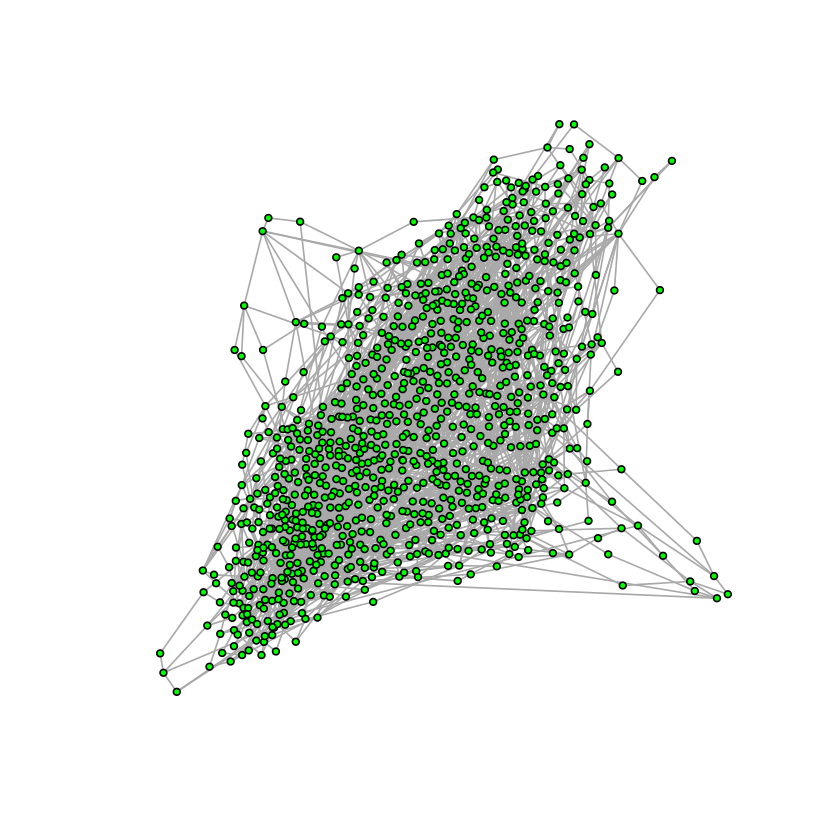

In [9]:
plot(g,vertex.color='green',vertex.size=2, vertex.label=NA)

In [10]:
getModularity<-function(g){
    fg <- fastgreedy.community(g,modularity=T)
    cmsize <- sizes(fg)
    print(cmsize)
    modularity(g, fg$membership)
}

getModularity(g)

Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17 
 83  71  53  32  54  64  47  44  46  73  18  39  47  58  69  93 109 


[1] 0.5220092

In [31]:
plotLoglog<-function(g){
    dd<-degree.distribution(g)
    xdegree<-seq(0,length(dd)-1)
    plot(xdegree,dd,main="Degree distribution of the network",xlab="Degree",ylab="Frequency")
    plot(log(xdegree),log(dd),main="Degree distribution of the network(log-log scale)") 
}

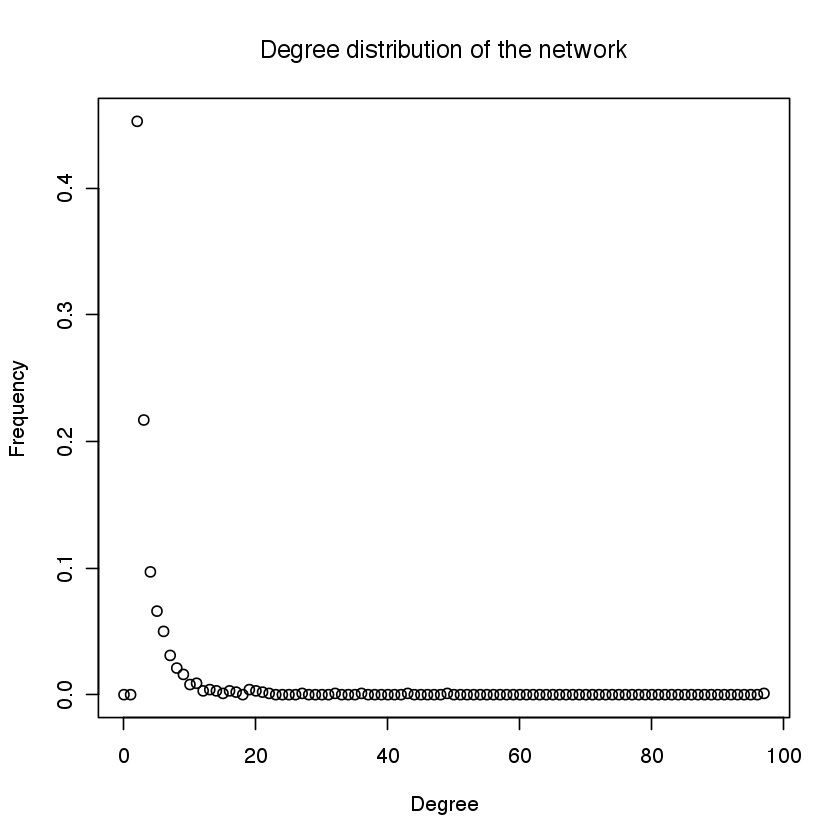

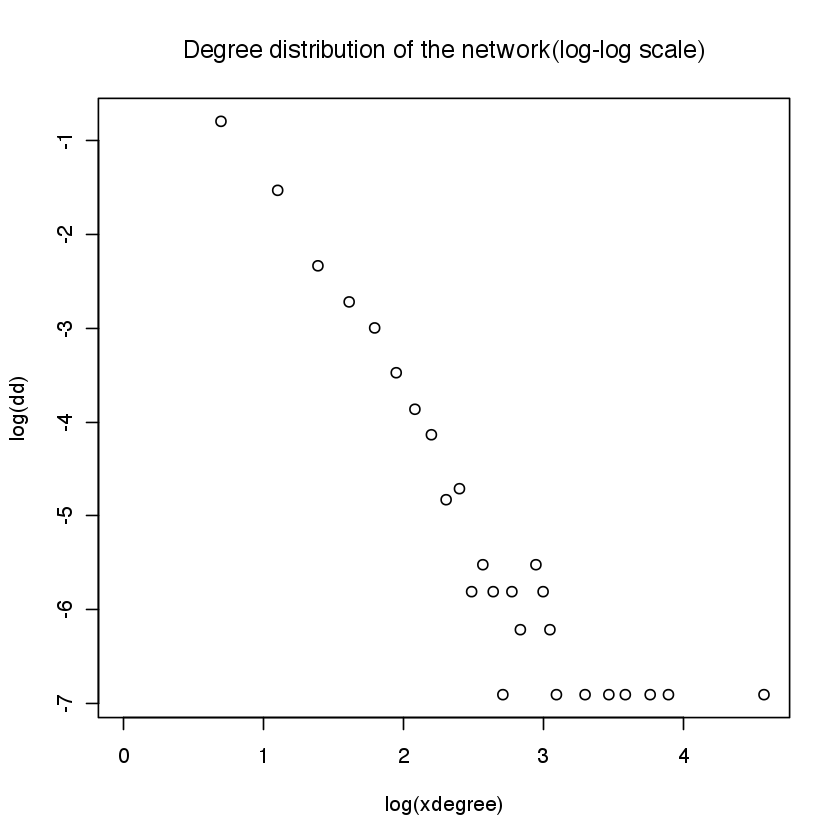

In [32]:
plotLoglog(g)

In [24]:
getAlpha<-function(g){
    d <- degree(g)
    fit <- fit_power_law(d,xmin=parameter_m)
    return(fit$alpha)
}

In [25]:
getAlpha(g)

[1] 2.448166

In [15]:
g10000<- barabasi.game(10000,m=parameter_m,directed=F)

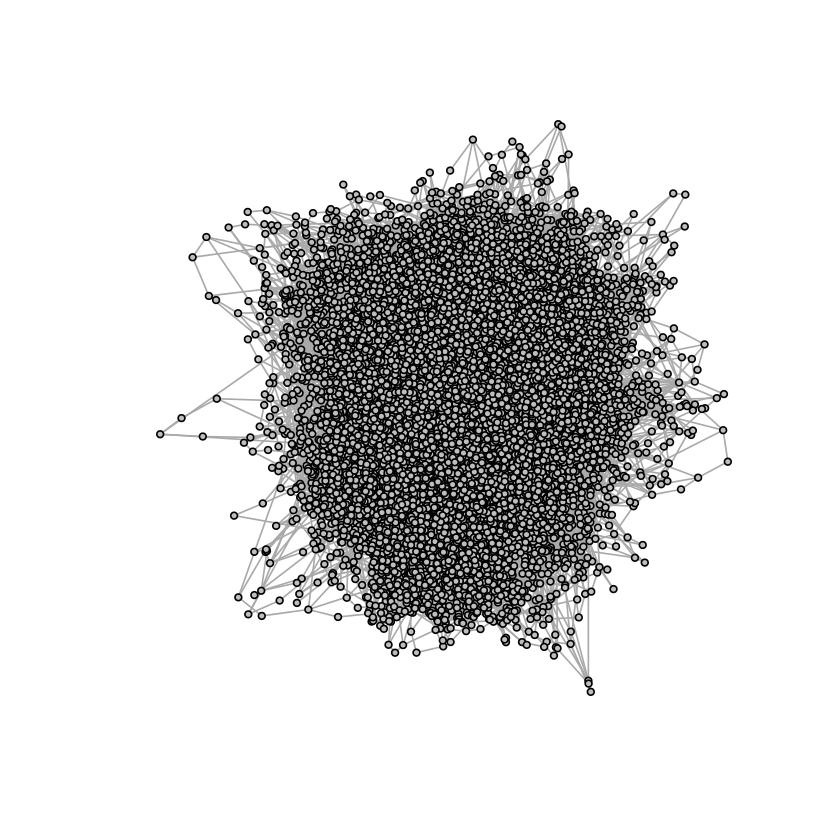

In [26]:
plot(g10000,vertex.color='grey',vertex.size=2, vertex.label=NA)

In [17]:
getModularity(g10000)

Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
165 110 110 151 380 148 197 181  78  75 133 205 169  60 101 137 796 793 137 438 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37 
 49 145 108 265 209 290 182  59 356 289 180 196 364 570 659 563 952 


[1] 0.5312375

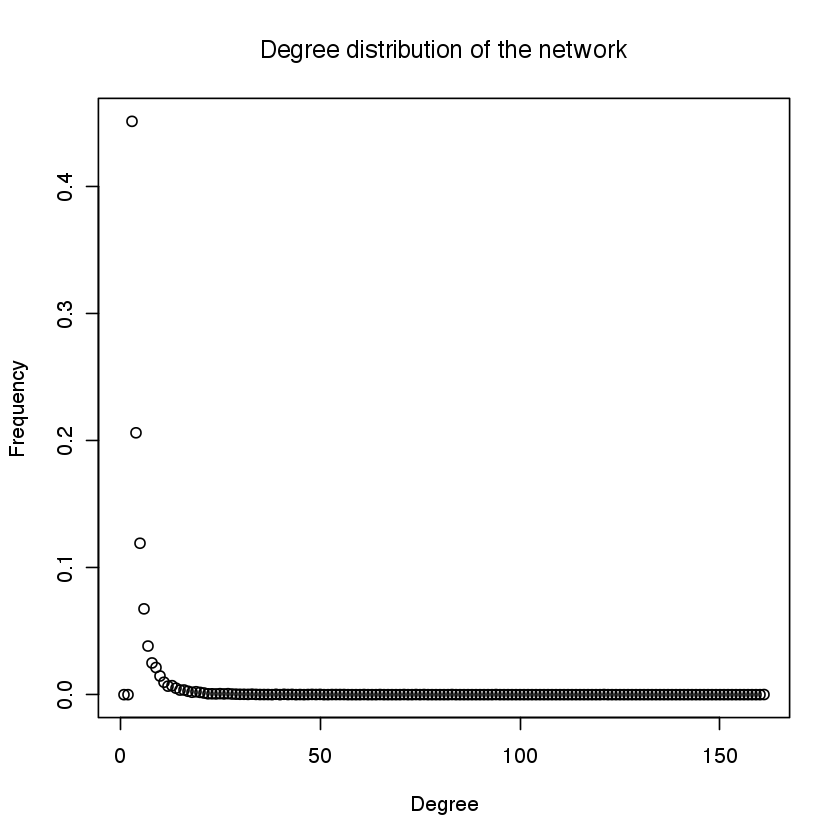

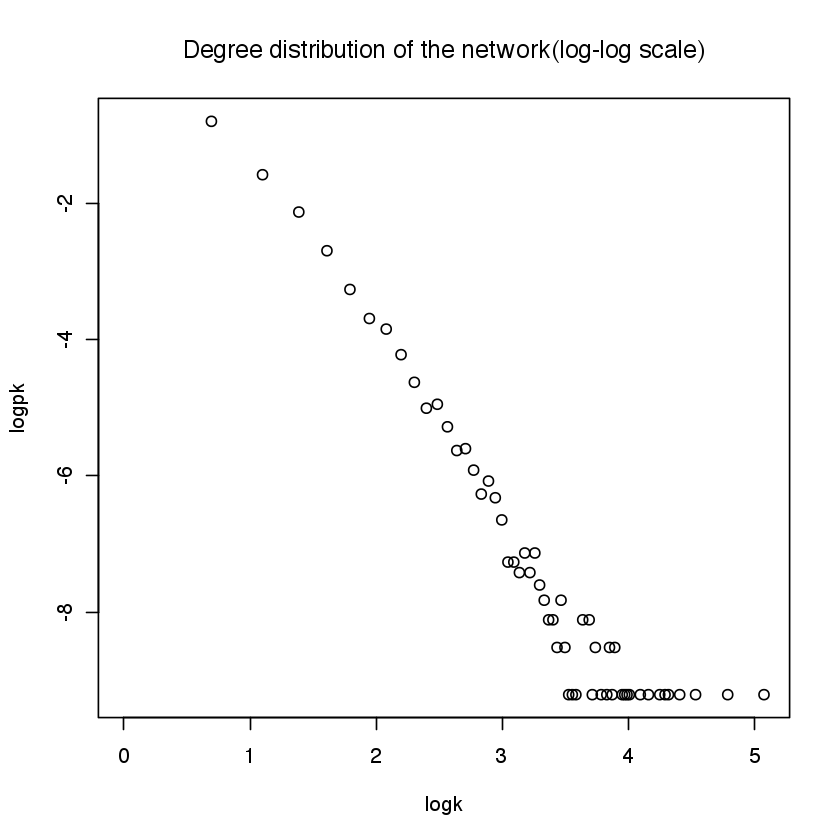

In [18]:
plotLoglog(g10000)

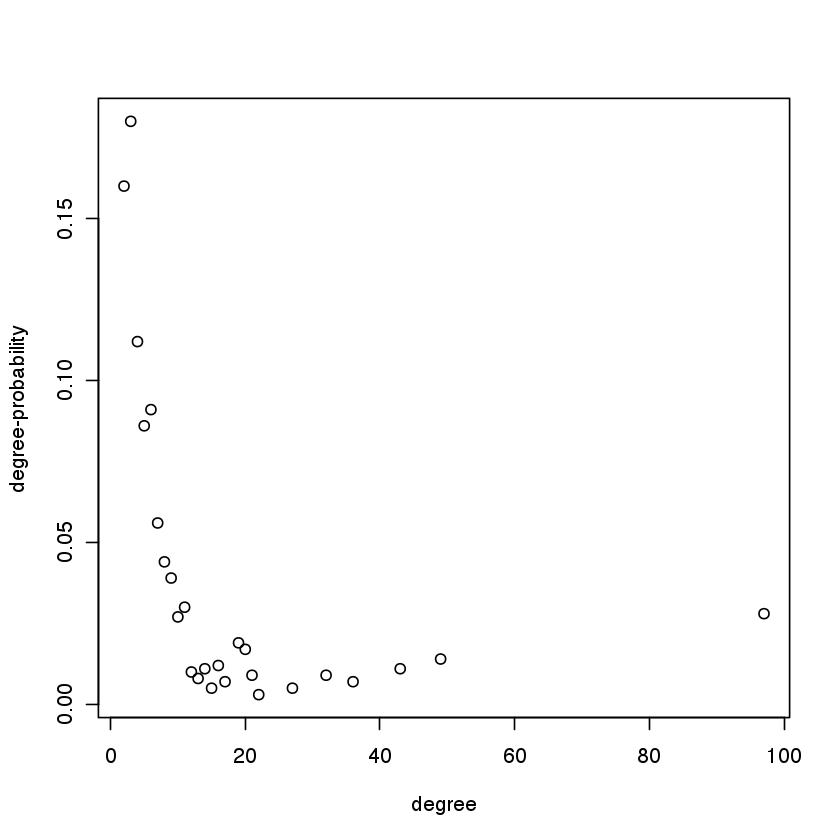

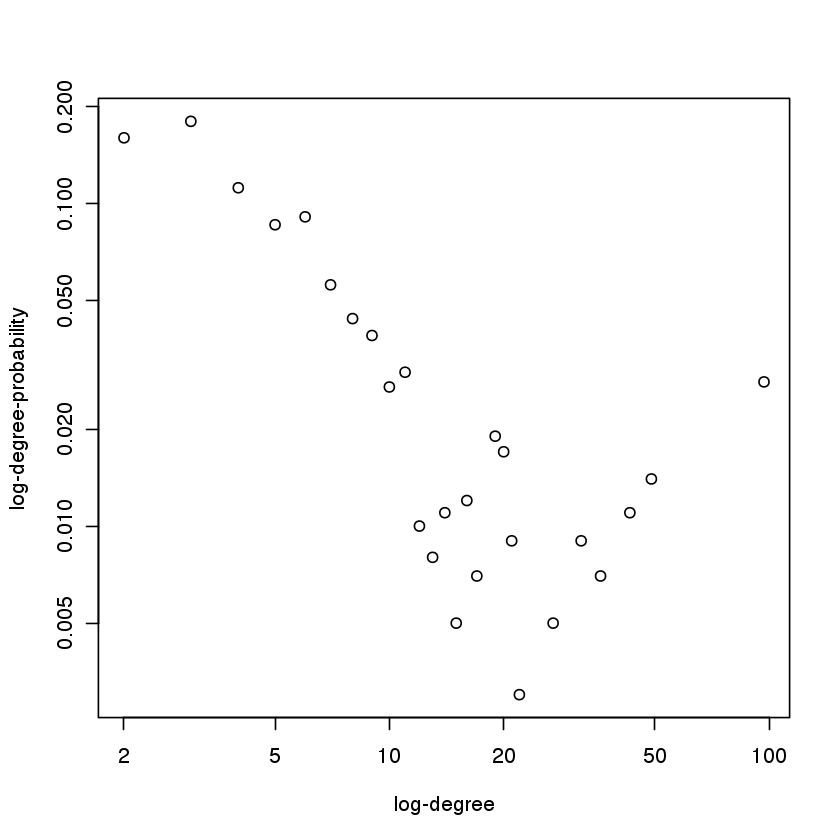

In [29]:
numSample=1000
nodes<-sample(1:1000,numSample,replace=T)
degrees<-rep(0,numSample)
for(i in 1:numSample){
    neighs=neighbors(g,nodes[i])
    randNeighbor=sample(1:length(neighs),1)
    d=degree(g,neighs[randNeighbor])
    degrees[i]=d
}
prob <- table(degrees)/numSample
plot(as.numeric(names(prob)),as.numeric(prob),xlab='degree',ylab='degree-probability')
plot(as.numeric(names(prob)),as.numeric(prob),log='xy',xlab='log-degree',ylab='log-degree-probability')

In [27]:
getAlpha(g10000)

[1] 2.442457

In [20]:
avgDegree<-function(age,t,m=parameter_m){
    return(m*sqrt(t/(t-age+1)))
}

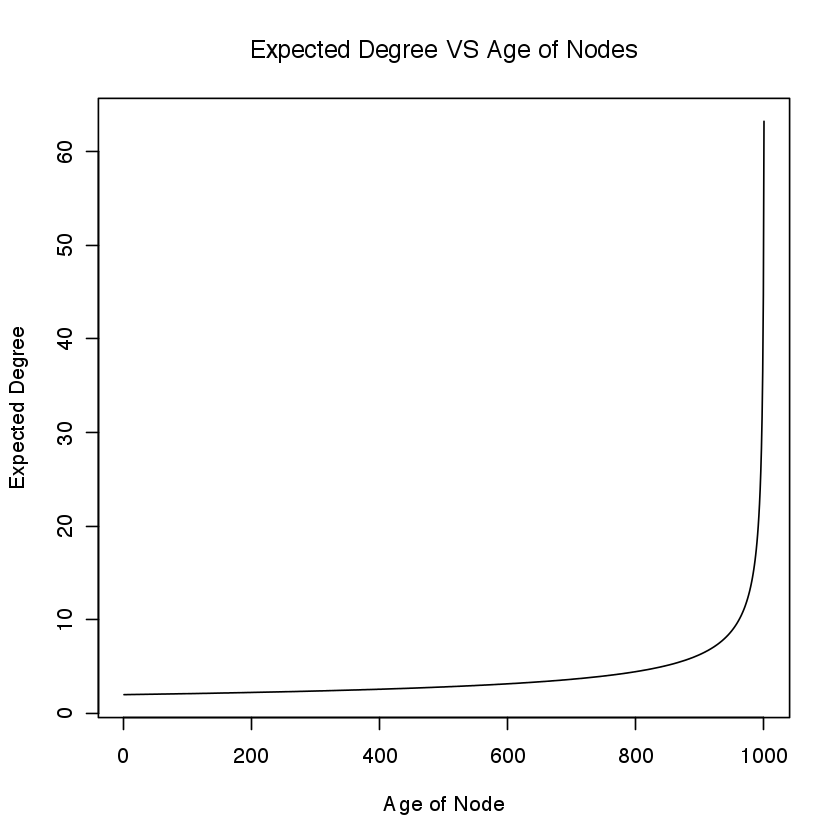

In [28]:
timestep=1000
agesequence<-seq(1,timestep)
plot(agesequence,avgDegree(agesequence,timestep,m=parameter_m),type='l',main="Expected Degree VS Age of Nodes",xlab="Age of Node",ylab="Expected Degree")